In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-data/sonar data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/sonar-data/sonar data.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [6]:
print("Shape:", df.shape)

Shape: (207, 61)


In [7]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539', '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645', '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783', '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080', '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537', '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834', '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383', '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167', '0.0180', '0.0084', '0.0090', '0.0032', 'R']


In [8]:
print("\nData Types:\n", df.dtypes)


Data Types:
 0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object


In [9]:
print("\nClass Distribution:\n", df['R'].value_counts())


Class Distribution:
 R
M    111
R     96
Name: count, dtype: int64


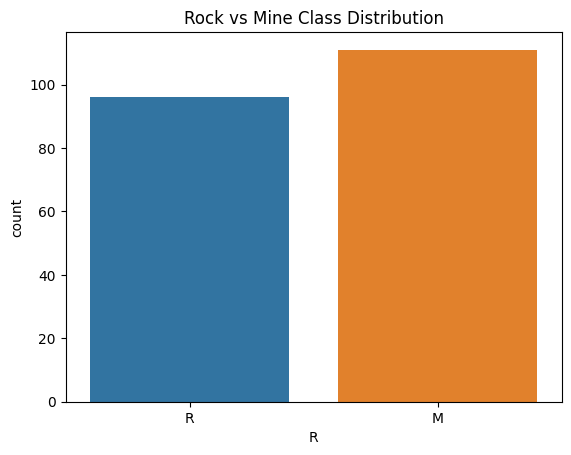

In [10]:
# Plot class distribution
sns.countplot(x='R', data=df)
plt.title('Rock vs Mine Class Distribution')
plt.show()

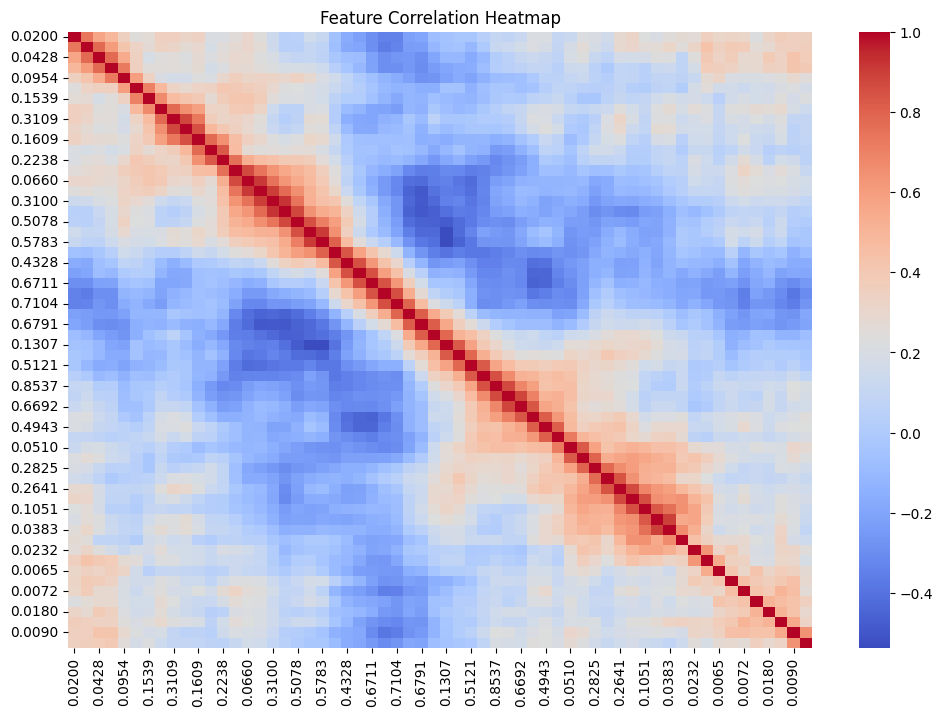

In [11]:
# Heatmap of feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :-1].astype(float).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split features and target
X = df.drop('R', axis=1).astype(float)
y = LabelEncoder().fit_transform(df['R'])  # 'R' -> 0, 'M' -> 1

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.69      0.73      0.71        15

    accuracy                           0.79        42
   macro avg       0.77      0.77      0.77        42
weighted avg       0.79      0.79      0.79        42



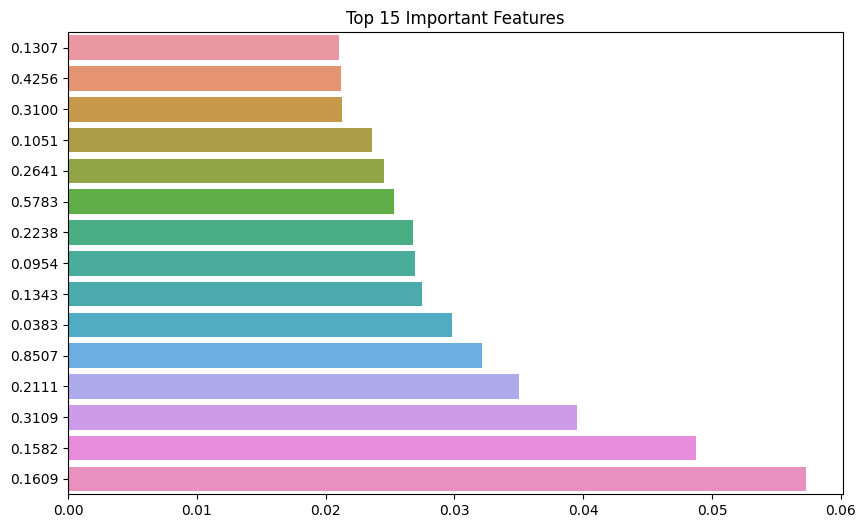

In [16]:
import numpy as np

# Plot top 15 important features
feat_imp = model.feature_importances_
top_idx = np.argsort(feat_imp)[-15:]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[top_idx], y=X.columns[top_idx])
plt.title("Top 15 Important Features")
plt.show()